In [33]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c74dfa24-1067-4a34-9c69-3b2bab37cf1a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-11-20T03:55:54.938Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9167}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9849, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [34]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [35]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9849,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19212125.00000,19212125.00000,NaN,1,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,16690.81370,16138737015.52513,-32.13640,-0.02007,0.35675,-1.30063,-12.48576,-12.21857,-22.11448,320665999162.68176,38.36000,350507087707.17999,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
1,1027,Ethereum,ETH,ethereum,6207,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,1218.30691,6074860532.74051,-13.80710,-0.07229,0.85308,-4.01922,-5.43776,-8.97450,-23.83159,149088926908.51889,17.83600,149088926908.51999,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
2,825,Tether,USDT,tether,42443,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65944935625.84322,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,0.99910,23715743254.74070,-24.42070,0.00124,-0.00622,0.05002,-0.09439,-0.09813,-0.09165,65885261864.27480,7.88190,73075580126.91000,NaN,2022-11-20T03:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-20 03:56:17.373591+00:00
3,3408,USD Coin,USDC,usd-coin,7060,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,44421555021.62791,44421555021.62791,NaN,4,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,1.00023,2023574322.91766,-21.43580,0.00525,-0.00070,-0.02175,0.02491,0.02235,0.01488,44431917133.74019,5.31580,44431917133.74000,NaN,2022-11-20T03:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-20 03:56:17.373591+00:00
4,1839,BNB,BNB,bnb,1140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159973146.87893,159979963.59043,NaN,5,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,273.20098,546543798.03101,-12.71480,-0.01190,0.25042,-4.26524,1.63178,2.25064,-8.47251,43704819883.00353,5.22850,54640195227.36000,NaN,2022-11-20T03:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
5,4687,Binance USD,BUSD,binance-usd,5531,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22872131211.45926,22872131211.45926,NaN,6,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,1.00101,3990803783.00143,-22.43170,-0.01274,0.01116,-0.03111,0.07858,0.05565,0.10881,22895344563.35762,2.73900,22895344563.36000,NaN,2022-11-20T03:54:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-11-20 03:56:17.373591+00:00
6,52,XRP,XRP,xrp,846,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50298735565.00000,99989214572.00000,NaN,7,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,0.39087,662741511.66338,-21.62420,-0.17788,2.95280,6.30298,-12.84435,-3.55681,15.53764,19660203123.03033,2.35190,39086873461.51000,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
7,2010,Cardano,ADA,cardano,592,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34414241041.77200,35157347935.91000,NaN,8,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,0.32884,158199624.76284,-26.11380,-0.36831,1.20652,-4.37053,-3.41362,-27.90485,-28.46733,11316808160.48041,1.35380,14797838098.58000,NaN,2022-11-20T03:54:00.0

In [36]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c74dfa24-1067-4a34-9c69-3b2bab37cf1a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now',utc=True)
    df = df.append(df2)
    
  

In [37]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API called successfully")
    sleep(60)
exit()    


{'status': {'timestamp': '2022-11-20T03:56:29.906Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9167}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9849, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\2002550619.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2022-11-20T03:57:31.002Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 9167}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9849, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\2002550619.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [38]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9849,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19212125.00000,19212125.00000,NaN,1,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,16690.81370,16138737015.52513,-32.13640,-0.02007,0.35675,-1.30063,-12.48576,-12.21857,-22.11448,320665999162.68176,38.36000,350507087707.17999,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
1,1027,Ethereum,ETH,ethereum,6207,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,1218.30691,6074860532.74051,-13.80710,-0.07229,0.85308,-4.01922,-5.43776,-8.97450,-23.83159,149088926908.51889,17.83600,149088926908.51999,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
2,825,Tether,USDT,tether,42443,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65944935625.84322,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,0.99910,23715743254.74070,-24.42070,0.00124,-0.00622,0.05002,-0.09439,-0.09813,-0.09165,65885261864.27480,7.88190,73075580126.91000,NaN,2022-11-20T03:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-20 03:56:17.373591+00:00
3,3408,USD Coin,USDC,usd-coin,7060,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,44421555021.62791,44421555021.62791,NaN,4,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,1.00023,2023574322.91766,-21.43580,0.00525,-0.00070,-0.02175,0.02491,0.02235,0.01488,44431917133.74019,5.31580,44431917133.74000,NaN,2022-11-20T03:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-20 03:56:17.373591+00:00
4,1839,BNB,BNB,bnb,1140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159973146.87893,159979963.59043,NaN,5,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,273.20098,546543798.03101,-12.71480,-0.01190,0.25042,-4.26524,1.63178,2.25064,-8.47251,43704819883.00353,5.22850,54640195227.36000,NaN,2022-11-20T03:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
5,4687,Binance USD,BUSD,binance-usd,5531,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22872131211.45926,22872131211.45926,NaN,6,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,1.00101,3990803783.00143,-22.43170,-0.01274,0.01116,-0.03111,0.07858,0.05565,0.10881,22895344563.35762,2.73900,22895344563.36000,NaN,2022-11-20T03:54:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-11-20 03:56:17.373591+00:00
6,52,XRP,XRP,xrp,846,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50298735565.00000,99989214572.00000,NaN,7,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,0.39087,662741511.66338,-21.62420,-0.17788,2.95280,6.30298,-12.84435,-3.55681,15.53764,19660203123.03033,2.35190,39086873461.51000,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
7,2010,Cardano,ADA,cardano,592,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34414241041.77200,35157347935.91000,NaN,8,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,0.32884,158199624.76284,-26.11380,-0.36831,1.20652,-4.37053,-3.41362,-27.90485,-28.46733,11316808160.48041,1.35380,14797838098.58000,NaN,2022-11-20T03:54:00.0

In [39]:
 pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [40]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9849,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19212125.00000,19212125.00000,NaN,1,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,16690.81370,16138737015.52513,-32.13640,-0.02007,0.35675,-1.30063,-12.48576,-12.21857,-22.11448,320665999162.68176,38.36000,350507087707.17999,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
1,1027,Ethereum,ETH,ethereum,6207,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,1218.30691,6074860532.74051,-13.80710,-0.07229,0.85308,-4.01922,-5.43776,-8.97450,-23.83159,149088926908.51889,17.83600,149088926908.51999,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
2,825,Tether,USDT,tether,42443,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65944935625.84322,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,0.99910,23715743254.74070,-24.42070,0.00124,-0.00622,0.05002,-0.09439,-0.09813,-0.09165,65885261864.27480,7.88190,73075580126.91000,NaN,2022-11-20T03:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-20 03:56:17.373591+00:00
3,3408,USD Coin,USDC,usd-coin,7060,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,44421555021.62791,44421555021.62791,NaN,4,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,1.00023,2023574322.91766,-21.43580,0.00525,-0.00070,-0.02175,0.02491,0.02235,0.01488,44431917133.74019,5.31580,44431917133.74000,NaN,2022-11-20T03:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-20 03:56:17.373591+00:00
4,1839,BNB,BNB,bnb,1140,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159973146.87893,159979963.59043,NaN,5,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,273.20098,546543798.03101,-12.71480,-0.01190,0.25042,-4.26524,1.63178,2.25064,-8.47251,43704819883.00353,5.22850,54640195227.36000,NaN,2022-11-20T03:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
5,4687,Binance USD,BUSD,binance-usd,5531,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22872131211.45926,22872131211.45926,NaN,6,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,1.00101,3990803783.00143,-22.43170,-0.01274,0.01116,-0.03111,0.07858,0.05565,0.10881,22895344563.35762,2.73900,22895344563.36000,NaN,2022-11-20T03:54:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-11-20 03:56:17.373591+00:00
6,52,XRP,XRP,xrp,846,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50298735565.00000,99989214572.00000,NaN,7,NaN,NaN,NaN,2022-11-20T03:55:00.000Z,0.39087,662741511.66338,-21.62420,-0.17788,2.95280,6.30298,-12.84435,-3.55681,15.53764,19660203123.03033,2.35190,39086873461.51000,NaN,2022-11-20T03:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-20 03:56:17.373591+00:00
7,2010,Cardano,ADA,cardano,592,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34414241041.77200,35157347935.91000,NaN,8,NaN,NaN,NaN,2022-11-20T03:54:00.000Z,0.32884,158199624.76284,-26.11380,-0.36831,1.20652,-4.37053,-3.41362,-27.90485,-28.46733,11316808160.48041,1.35380,14797838098.58000,NaN,2022-11-20T03:54:00.0

In [41]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01823,0.35455,-1.30012,-12.48363,-12.21933,-22.11339
Ethereum,-0.06109,0.85650,-4.01698,-5.42890,-8.96765,-23.82259
Tether,0.00053,-0.00625,0.04931,-0.09493,-0.09841,-0.09278
USD Coin,0.00339,-0.00150,-0.02423,0.02318,0.02137,0.01708
BNB,-0.00487,0.25475,-4.28195,1.64775,2.25663,-8.39498
Binance USD,0.01053,0.01607,-0.01534,0.07695,0.06109,0.10064
XRP,-0.16674,2.94773,6.29930,-12.84570,-3.55963,15.53592
Cardano,-0.36392,1.19150,-4.38186,-3.39789,-27.90990,-28.44878
Dogecoin,0.34815,0.73422,-6.19379,44.10471,43.54243,23.83213


In [42]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.01823
           quote.USD.percent_change_24h     0.35455
           quote.USD.percent_change_7d     -1.30012
           quote.USD.percent_change_30d   -12.48363
           quote.USD.percent_change_60d   -12.21933
                                             ...   
Avalanche  quote.USD.percent_change_24h     0.89405
           quote.USD.percent_change_7d     -2.63915
           quote.USD.percent_change_30d   -13.84110
           quote.USD.percent_change_60d   -23.06740
           quote.USD.percent_change_90d   -42.86887
Length: 120, dtype: float64

In [43]:
df5 = df4.to_frame(name='values')

In [44]:
df5.count()

values    120
dtype: int64

In [45]:
index = pd.Index(range(29892))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01823
1,Bitcoin,quote.USD.percent_change_24h,0.35455
2,Bitcoin,quote.USD.percent_change_7d,-1.30012
3,Bitcoin,quote.USD.percent_change_30d,-12.48363
4,Bitcoin,quote.USD.percent_change_60d,-12.21933
...,...,...,...
115,Avalanche,quote.USD.percent_change_24h,0.89405
116,Avalanche,quote.USD.percent_change_7d,-2.63915
117,Avalanche,quote.USD.percent_change_30d,-13.84110
118,Avalanche,quote.USD.percent_change_60d,-23.06740


In [46]:
df7 = df6.rename(columns={'level_1':'percent_change'})

In [52]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])

In [53]:
df7

,name,percent_change,values
0,Bitcoin,1h,-0.01823
1,Bitcoin,24h,0.35455
2,Bitcoin,7d,-1.30012
3,Bitcoin,30d,-12.48363
4,Bitcoin,60d,-12.21933
...,...,...,...
115,Avalanche,24h,0.89405
116,Avalanche,7d,-2.63915
117,Avalanche,30d,-13.84110
118,Avalanche,60d,-23.06740


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


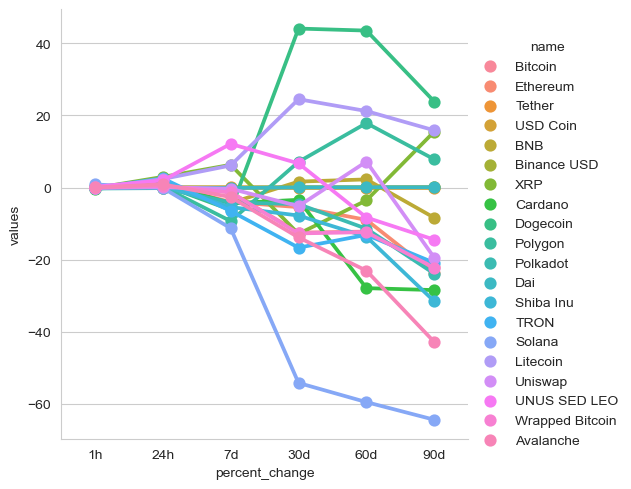

In [62]:
sns.catplot(x='percent_change', y='values',hue='name',data=df7,kind='point')
plt.show()